## Loader les données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from os import path
import glob

#can be removed
from jupyterthemes import jtplot
jtplot.style()

In [2]:
if not path.exists("raw_data.csv"):
    data_path = "reddit-dataset/data"
    all_files = glob.glob(data_path + "/*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        # only keep x rows per file
        df = df[0:1000]
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame.to_csv("raw_data.csv", index=False)

In [82]:
df = pd.read_csv("raw_data.csv")
df

,0,1,10,11,2,3,4,5,6,7,8,9,Unnamed: 0
0,NaN,466jwy,1.0,NaN,startrek,television,1455683402.0,JesseBotwin,1.0,0.0,2257.0,937.0,0
1,that sounds awesome i ll check it out tonight ...,d027xk0,0.0,NaN,startrek,television,1455650159.0,notheebie,1.0,0.0,307.0,26352.0,1
2,star trek tos 50th anniversary tribute game n...,463gry,0.0,NaN,startrek,television,1455643118.0,thisoldfart,3.0,0.0,3811.0,878.0,2
3,would nt spock have found it a bit insulting ...,461kw5,0.0,NaN,startrek,television,1455611558.0,FPSD,18.0,0.0,1.0,1486.0,3
4,also what is a soul,d01pqtn,0.0,NaN,startrek,television,1455611836.0,Realik,2.0,0.0,16429.0,14192.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,rip,d01fbk2,NaN,NaN,tf2,gaming,1455589704.0,EbolaChan23,14.0,0.0,0.0,0.0,995
49996,i regret buying the campaign pass as i ve onl...,d01wfoy,NaN,NaN,tf2,gaming,1455633270.0,DogemondSword,1.0,0.0,0.0,0.0,996
49997,or just buy the skins on the market for less t...,d01hu56,NaN,NaN,tf2,gaming,1455593683.0,Dystopiq,1.0,0.0,0.0,0.0,997
49998,game changing,d021hzk,NaN,NaN,tf2,gaming,1455641348.0,Hardy_hur,1.0,0.0,0.0,0.0,998


In [83]:
#rename columns
df = df.rename(columns={"0": "text", "2": "subreddit", "3":"label"})

#only keep important columns
df = df[["text", "subreddit" ,"label"]]

# remove empty texts
df = df[(df["text"] != " removed ") & (df["text"] != " deleted ") & (df["text"] != np.nan)]

# remove NAN values
df = df.dropna()

# only keep at least 10 words per item
df = df[df["text"].str.count(' ') > 10]

# drop duplicates
df = df.drop_duplicates(subset="text")
df

,text,subreddit,label
1,that sounds awesome i ll check it out tonight ...,startrek,television
2,star trek tos 50th anniversary tribute game n...,startrek,television
3,would nt spock have found it a bit insulting ...,startrek,television
5,spock was half human and had worked for some t...,startrek,television
6,i got a notice from audible this afternoon tha...,startrek,television
...,...,...,...
49993,they re doing this because the tb passes have ...,tf2,gaming
49994,nice of valve to give those who joined tough b...,tf2,gaming
49996,i regret buying the campaign pass as i ve onl...,tf2,gaming
49997,or just buy the skins on the market for less t...,tf2,gaming


In [100]:
df["text"].value_counts()

ahw master of orion does nt seem to work                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [84]:
labels = pd.get_dummies(df["label"],prefix='cat')
labels

,cat_entertainment,cat_gaming,cat_humor,cat_learning,cat_lifestyle,cat_news,cat_television
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
49993,0,1,0,0,0,0,0
49994,0,1,0,0,0,0,0
49996,0,1,0,0,0,0,0
49997,0,1,0,0,0,0,0


In [85]:
data = df["text"].values

In [11]:
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.corpus import stopwords

In [14]:
class Preprocessor:
    def __init__(self, stem=True, punctuation=True, digit=True):
        self.st = SnowballStemmer("french", ignore_stopwords=True)
        self.punctuations = set(string.punctuation)
        self.stem = stem
        self.punctuation = punctuation
        self.digit = digit
    
    def raw_preprocess(self, token_list):
        new_token_list = []
        for token in token_list:
            is_token_valid = True
            token = token.lower()
            
            # stemming
            if self.stem:
                token = self.st.stem(token)

            # punctuation filtering
            if self.punctuation and token in self.punctuations:
                is_token_valid = False

            # digit filtering
            elif self.digit and token.isdigit():
                is_token_valid = False
                
            # link filtering
            elif token == "http" or token == "https" or token[:9] == "iimgurcom":
                is_token_valid = False
            # add token to new sub list
            if is_token_valid:
                new_token_list.append(token)
        return new_token_list
        

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

preprocessor = Preprocessor()
vectorizer = TfidfVectorizer(preprocessor=preprocessor.raw_preprocess ,tokenizer=identity_tokenizer)
IDF_data = vectorizer.fit_transform(data)

In [87]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=26, algorithm='randomized', n_iter=100)
svd.fit(IDF_data)

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=100,
             random_state=None, tol=0.0)

In [88]:
sum(svd.explained_variance_)

0.07783471941039057

In [89]:
SVD_data = svd.transform(IDF_data)

## Même approche que le tp2

Knn

In [90]:
y_data = labels.values

In [91]:
X_data = SVD_data

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=32)

In [93]:
print(len(X_train))
print(len(X_test))

14623
6268


In [94]:
y_train[2]

array([0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=50)
knn_classifier.fit(X_train, y_train)

y_scores = knn_classifier.predict_proba(X_test)

In [96]:
y_pred = knn_classifier.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.028557753669432036

In [98]:
accuracies = []
n_neighbors = []
for i in range (1, 50, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    n_neighbors.append(i)

In [99]:
accuracies

[0.2372367581365667,
 0.16097638800255265,
 0.12428206764518188,
 0.10641352903637524,
 0.09109763880025526,
 0.08184428844926611,
 0.0748245054243778,
 0.07051691129546905,
 0.06589023611997448,
 0.06062539885130823,
 0.05759412890874282,
 0.05408423739629866,
 0.050574345883854496,
 0.04802169751116784,
 0.04642629227823867,
 0.04706445437141034,
 0.04339502233567326,
 0.042118698149329926,
 0.03924696873005743,
 0.04068283343969368,
 0.039406509253350354,
 0.03860880663688577,
 0.03621569878749202,
 0.035737077217613274,
 0.03382259093809828]

## Deep learning

In [29]:
#data = df["text"].values
#data = data[:25000]
#y_data = y_data[:25000]

In [101]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [102]:
#word_index = {}
#word_index["<PAD>"] = 0
#word_index["<START>"] = 1
#word_index["<UNK>"] = 2  # unknown
#word_index["<UNUSED>"] = 3

In [103]:
from nltk.util import ngrams
from collections import defaultdict
from os import linesep

def build_voc(corpus):
    
    word_dict = {}

    for document in corpus:
        for word in document:
            if word not in word_dict:
                word_dict[word] = len(word_dict) + 1 # + 1 pcq 0 = padding

    # word_dict_cleaned = {}
    # for key in word_dict:
    #     if word_dict[key] >= 5:
    #         word_dict_cleaned[key] = word_dict[key]

    with open("./vocab.txt", "w") as f:
        for word in word_dict.keys():
            f.write(word + "\n")
        
    return word_dict

In [104]:
def split_items(list_of_strings):
    stripped_strings = []
    for string in list_of_strings:
        stripped_strings.append(string.split(' '))
    return stripped_strings

In [105]:
splited_data = split_items(data)

In [107]:
splited_data[1]

['star',
 'trek',
 'tos',
 '',
 '50th',
 'anniversary',
 'tribute',
 'game',
 'needs',
 'beta',
 'feedback',
 '',
 'download',
 'here',
 '',
 'http',
 '',
 'gambitrealmcominstallerdownload_release45_vrphp',
 '',
 '',
 'features',
 '',
 '',
 '',
 '',
 'all',
 'decks',
 'exploration',
 'mission',
 '',
 'entire',
 'ship',
 'accessible',
 '',
 '',
 '15',
 'training',
 'missions',
 '',
 'goldredblue',
 'shirts',
 'each',
 'get',
 '5',
 'skill',
 'tiers',
 '',
 '',
 '5',
 'interactive',
 'episodes',
 '',
 'watch',
 'clips',
 'and',
 'then',
 'take',
 'control',
 'of',
 'the',
 'action',
 '',
 '',
 'turbolift',
 'shafts',
 'exploration',
 'mission',
 '',
 'go',
 'from',
 'top',
 'to',
 'bottom',
 'of',
 'ship',
 'within',
 'the',
 'shafts',
 '',
 '',
 'deck',
 '6',
 'movie',
 'theater',
 'mission',
 '',
 'watch',
 'movie',
 'trailers',
 'in',
 'the',
 'theater',
 '',
 '',
 'full',
 'oculus',
 'rift',
 'support',
 '',
 'dk1',
 'tested',
 '',
 '',
 'full',
 'game',
 'controller',
 'support',
 '

In [108]:
vocab = build_voc(splited_data)

In [109]:
vocab

{'that': 1,
 'sounds': 2,
 'awesome': 3,
 'i': 4,
 'll': 5,
 'check': 6,
 'it': 7,
 'out': 8,
 'tonight': 9,
 'hope': 10,
 'has': 11,
 'voice': 12,
 'support': 13,
 'so': 14,
 'can': 15,
 'say': 16,
 '': 17,
 'engage': 18,
 'haha': 19,
 'star': 20,
 'trek': 21,
 'tos': 22,
 '50th': 23,
 'anniversary': 24,
 'tribute': 25,
 'game': 26,
 'needs': 27,
 'beta': 28,
 'feedback': 29,
 'download': 30,
 'here': 31,
 'http': 32,
 'gambitrealmcominstallerdownload_release45_vrphp': 33,
 'features': 34,
 'all': 35,
 'decks': 36,
 'exploration': 37,
 'mission': 38,
 'entire': 39,
 'ship': 40,
 'accessible': 41,
 '15': 42,
 'training': 43,
 'missions': 44,
 'goldredblue': 45,
 'shirts': 46,
 'each': 47,
 'get': 48,
 '5': 49,
 'skill': 50,
 'tiers': 51,
 'interactive': 52,
 'episodes': 53,
 'watch': 54,
 'clips': 55,
 'and': 56,
 'then': 57,
 'take': 58,
 'control': 59,
 'of': 60,
 'the': 61,
 'action': 62,
 'turbolift': 63,
 'shafts': 64,
 'go': 65,
 'from': 66,
 'top': 67,
 'to': 68,
 'bottom': 69,


In [110]:
vocab_size = len(vocab)
vocab_size

47835

In [111]:
def get_max_sentence_length(corpus):
    return max([len(sentence) for sentence in corpus])

In [112]:
def get_number_vectors(X):
    return [[vocab[word] for word in sentence] for sentence in X]

In [113]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

max_sentence_length = get_max_sentence_length(splited_data)
print("max sentence length: ", max_sentence_length)

def get_padded_sequences(X):
    return pad_sequences(sequences=get_number_vectors(X),
                         padding='post',
                         maxlen=max_sentence_length)

padded_data = get_padded_sequences(splited_data)

max sentence length:  10000


In [284]:
#using padded raw data from tf
#X_train, X_test, y_train, y_test = train_test_split(padded_data, y_data, test_size=0.3, random_state=32)

# using svd data from earlier
X_train, X_test, y_train, y_test = train_test_split(SVD_data, y_data, test_size=0.3, random_state=32)

# using tf-idf data
#X_train, X_test, y_train, y_test = train_test_split(IDF_data, y_data, test_size=0.3, random_state=32)

In [368]:
model = keras.Sequential()
#model.add(keras.layers.Embedding(vocab_size + 1, 16))
model.add(keras.layers.Flatten(input_shape=(26,)))
#model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(7, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 26)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 1024)              27648     
_________________________________________________________________
dense_109 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_110 (Dense)            (None, 16)                16400     
_________________________________________________________________
dense_111 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_112 (Dense)            (None, 7)                 119       
Total params: 1,094,039
Trainable params: 1,094,039
Non-trainable params: 0
___________________________________________

In [369]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [370]:
partial_x_train, x_validation, partial_y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=32)

In [371]:
sum_y = [0 for i in range(7)]
sum_y

[0, 0, 0, 0, 0, 0, 0]

In [372]:
for entry in partial_y_train:
    sum_y = sum_y+ entry
sum_y

array([ 475, 1937,  971, 1341, 2074, 1674, 1764])

In [373]:
print("proportion classe majoritaire: " + str((max(sum_y)/sum(sum_y))))

proportion classe majoritaire: 0.20261821023837437


In [374]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_validation, y_validation),
                   verbose=1)

Train on 10236 samples, validate on 4387 samples
Epoch 1/30
10236/10236 [==============================] - 2s 172us/sample - loss: 1.8858 - acc: 0.1993 - val_loss: 1.8525 - val_acc: 0.2241
Epoch 2/30
10236/10236 [==============================] - 1s 102us/sample - loss: 1.8240 - acc: 0.2419 - val_loss: 1.8069 - val_acc: 0.2710
Epoch 3/30
10236/10236 [==============================] - 1s 100us/sample - loss: 1.7856 - acc: 0.2896 - val_loss: 1.7922 - val_acc: 0.2783
Epoch 4/30
10236/10236 [==============================] - 1s 102us/sample - loss: 1.7658 - acc: 0.2933 - val_loss: 1.7789 - val_acc: 0.2827
Epoch 5/30
10236/10236 [==============================] - 1s 102us/sample - loss: 1.7502 - acc: 0.2978 - val_loss: 1.7721 - val_acc: 0.2833
Epoch 6/30
10236/10236 [==============================] - 1s 102us/sample - loss: 1.7492 - acc: 0.2982 - val_loss: 1.7829 - val_acc: 0.2815
Epoch 7/30
10236/10236 [==============================] - 1s 102us/sample - loss: 1.7380 - acc: 0.3032 - val_lo

In [375]:
results = model.evaluate(X_test, y_test)

print(results)

6268/6268 [==============================] - 1s 105us/sample - loss: 1.9414 - acc: 0.3092
[1.9413530541287918, 0.30918953]


In [359]:
results

[1.8946113947020569, 0.31589022]

In [360]:
X_test

array([[ 0.93081006,  0.05342393, -0.10978302, ...,  0.0746351 ,
         0.04631718, -0.03004662],
       [ 0.92287194, -0.06302863,  0.10981067, ..., -0.00246381,
         0.00649271, -0.01509693],
       [ 0.97676954,  0.08104071, -0.04054934, ..., -0.00768969,
         0.00981469, -0.00498661],
       ...,
       [ 0.9384716 , -0.11359456,  0.05634709, ..., -0.01533942,
         0.00552026, -0.00787811],
       [ 0.91713106, -0.05958326, -0.11787711, ..., -0.01916823,
         0.01108251, -0.01706194],
       [ 0.95049272, -0.23388267,  0.04524423, ..., -0.00457575,
         0.01085374, -0.00431149]])

In [361]:
preds = model.predict_classes(X_test)
pred_dict = {}
for pred in preds:
    if pred not in pred_dict:
        pred_dict[pred] = 1
    else:
        pred_dict[pred] += 1
print(sum_y)
pred_dict

[ 475 1937  971 1341 2074 1674 1764]


{4: 1633, 1: 1545, 3: 555, 5: 964, 6: 1297, 2: 274}

In [362]:
preds = model.predict(X_test)
preds

array([[0.00403902, 0.01132578, 0.01090887, ..., 0.04925615, 0.02520189,
        0.01568952],
       [0.24193415, 0.5235556 , 0.35870975, ..., 0.31504807, 0.11126432,
        0.41913474],
       [0.03808454, 0.14420179, 0.11933377, ..., 0.02313456, 0.10098621,
        0.12902704],
       ...,
       [0.18297976, 0.76975346, 0.27985966, ..., 0.09804836, 0.13135538,
        0.42140192],
       [0.02724525, 0.1469261 , 0.05070403, ..., 0.09241137, 0.30770525,
        0.03160805],
       [0.00794715, 0.06667385, 0.01623291, ..., 0.00655037, 0.16211729,
        0.03617645]], dtype=float32)

In [363]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [364]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

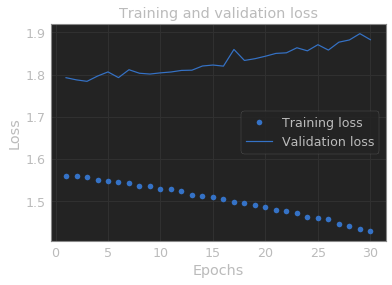

In [365]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

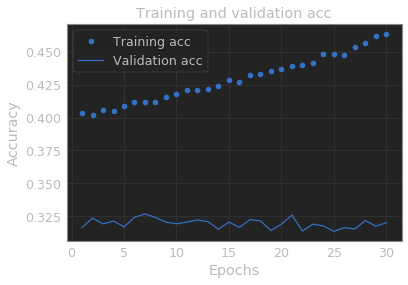

In [366]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()